In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, classification_report, confusion_matrix
)

In [43]:
try:
    df = pd.read_csv('ds_salaries.csv')
    print("DataFrame 'df' loaded successfully.")
    print(f"Shape of initial DataFrame: {df.shape}")
    print(df.head())
except FileNotFoundError:
    print("Error: The file 'your_datafile.csv' was not found. Please check the path.")
except Exception as e:
    print(f"An error occurred while loading the DataFrame: {e}")

if 'salary_in_usd' in df.columns:
    df['salary_in_usd_log'] = np.log1p(df['salary_in_usd'])
    print("Created 'salary_in_usd_log' column.")
else:
    print("Warning: 'salary_in_usd' column not found. 'salary_in_usd_log' cannot be created here.")

DataFrame 'df' loaded successfully.
Shape of initial DataFrame: (3755, 11)
   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_l

In [44]:
if 'job_title' in df.columns:
    top_n_job_titles = 10
    job_title_counts = df['job_title'].value_counts()
    top_titles = job_title_counts.nlargest(top_n_job_titles).index

    df['job_title_grouped'] = df['job_title'].apply(lambda x: x if x in top_titles else 'Other_Job_Title')
    print(f"'job_title_grouped' created. Value counts:\n{df['job_title_grouped'].value_counts().head()}\n")
else:
    print("Warning: 'job_title' column not found. Cannot create 'job_title_grouped'.")

if 'company_location' in df.columns:
    top_n_locations = 5
    location_counts = df['company_location'].value_counts()
    top_locations = location_counts.nlargest(top_n_locations).index

    df['company_location_grouped'] = df['company_location'].apply(lambda x: x if x in top_locations else 'Other_Location')
    print(f"'company_location_grouped' created. Value counts:\n{df['company_location_grouped'].value_counts().head()}\n")
else:
    print("Warning: 'company_location' column not found. Cannot create 'company_location_grouped'.")

if 'employee_residence' in df.columns:
    top_n_residences = 5
    residence_counts = df['employee_residence'].value_counts()
    top_residences = residence_counts.nlargest(top_n_residences).index

    df['employee_residence_grouped'] = df['employee_residence'].apply(lambda x: x if x in top_residences else 'Other_Residence')
    print(f"'employee_residence_grouped' created. Value counts:\n{df['employee_residence_grouped'].value_counts().head()}\n")
else:
    print("Warning: 'employee_residence' column not found. Cannot create 'employee_residence_grouped'.")

if 'employment_type' in df.columns:
    df['employment_type_grouped'] = df['employment_type']
    print(f"'employment_type_grouped' created (or mapped from 'employment_type'). Value counts:\n{df['employment_type_grouped'].value_counts().head()}\n")
else:
    print("Warning: 'employment_type' column not found. Cannot create 'employment_type_grouped'.")


print("\nColumns after grouping:")
print(df.info())

'job_title_grouped' created. Value counts:
job_title_grouped
Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Other_Job_Title               535
Machine Learning Engineer     289
Name: count, dtype: int64

'company_location_grouped' created. Value counts:
company_location_grouped
US                3040
Other_Location     321
GB                 172
CA                  87
ES                  77
Name: count, dtype: int64

'employee_residence_grouped' created. Value counts:
employee_residence_grouped
US                 3004
Other_Residence     348
GB                  167
CA                   85
ES                   80
Name: count, dtype: int64

'employment_type_grouped' created (or mapped from 'employment_type'). Value counts:
employment_type_grouped
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64


Columns after grouping:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 1

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 32.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


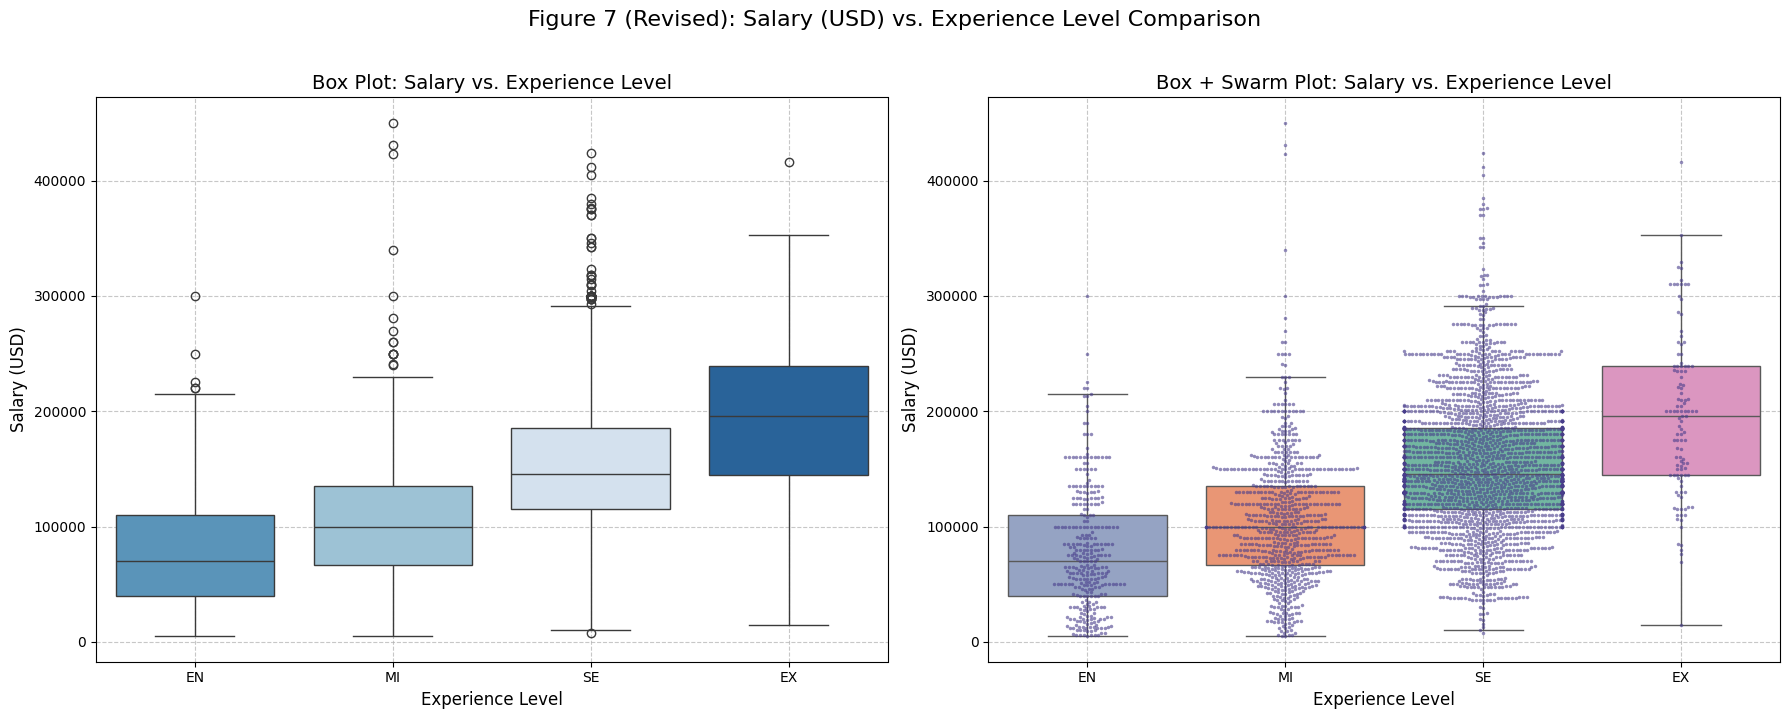

In [45]:
swarm_color = "darkslateblue"
swarm_alpha = 0.6
swarm_size = 2.5

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

sns.boxplot(data=df, x='experience_level', y='salary_in_usd', order=['EN', 'MI', 'SE', 'EX'],
            ax=axes[0], hue='experience_level', legend=False, palette="Blues")
axes[0].set_title('Box Plot: Salary vs. Experience Level', fontsize=14)
axes[0].set_xlabel('Experience Level', fontsize=12)
axes[0].set_ylabel('Salary (USD)', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7)

sns.boxplot(data=df, x='experience_level', y='salary_in_usd', order=['EN', 'MI', 'SE', 'EX'],
            showfliers=False, ax=axes[1], palette="Set2", saturation=0.75,
            hue='experience_level', legend=False)
sns.swarmplot(data=df, x='experience_level', y='salary_in_usd', order=['EN', 'MI', 'SE', 'EX'],
              color=swarm_color, alpha=swarm_alpha, size=swarm_size, ax=axes[1])
axes[1].set_title('Box + Swarm Plot: Salary vs. Experience Level', fontsize=14)
axes[1].set_xlabel('Experience Level', fontsize=12)
axes[1].set_ylabel('Salary (USD)', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.suptitle('Figure 7 (Revised): Salary (USD) vs. Experience Level Comparison', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 42.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 32.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


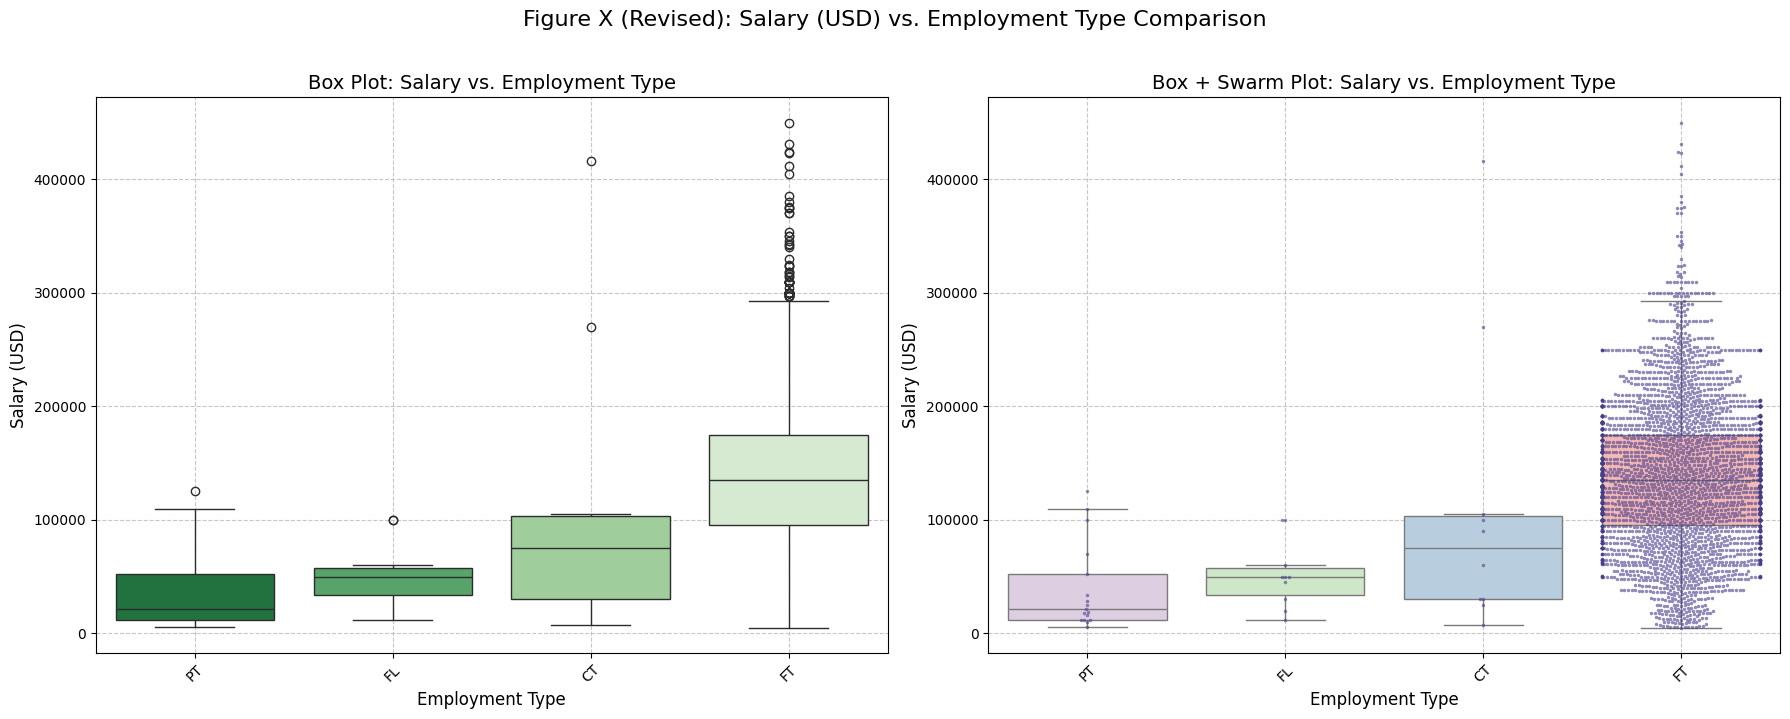

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
employment_order = df.groupby('employment_type')['salary_in_usd'].median().sort_values().index

sns.boxplot(data=df, x='employment_type', y='salary_in_usd', order=employment_order,
            ax=axes[0], hue='employment_type', legend=False, palette="Greens")
axes[0].set_title('Box Plot: Salary vs. Employment Type', fontsize=14)
axes[0].set_xlabel('Employment Type', fontsize=12)
axes[0].set_ylabel('Salary (USD)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, linestyle='--', alpha=0.7)

sns.boxplot(data=df, x='employment_type', y='salary_in_usd', order=employment_order,
            showfliers=False, ax=axes[1], palette="Pastel1", saturation=0.8,
            hue='employment_type', legend=False)
sns.swarmplot(data=df, x='employment_type', y='salary_in_usd', order=employment_order,
              color=swarm_color, alpha=swarm_alpha, size=swarm_size, ax=axes[1])
axes[1].set_title('Box + Swarm Plot: Salary vs. Employment Type', fontsize=14)
axes[1].set_xlabel('Employment Type', fontsize=12)
axes[1].set_ylabel('Salary (USD)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.suptitle('Figure X (Revised): Salary (USD) vs. Employment Type Comparison', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


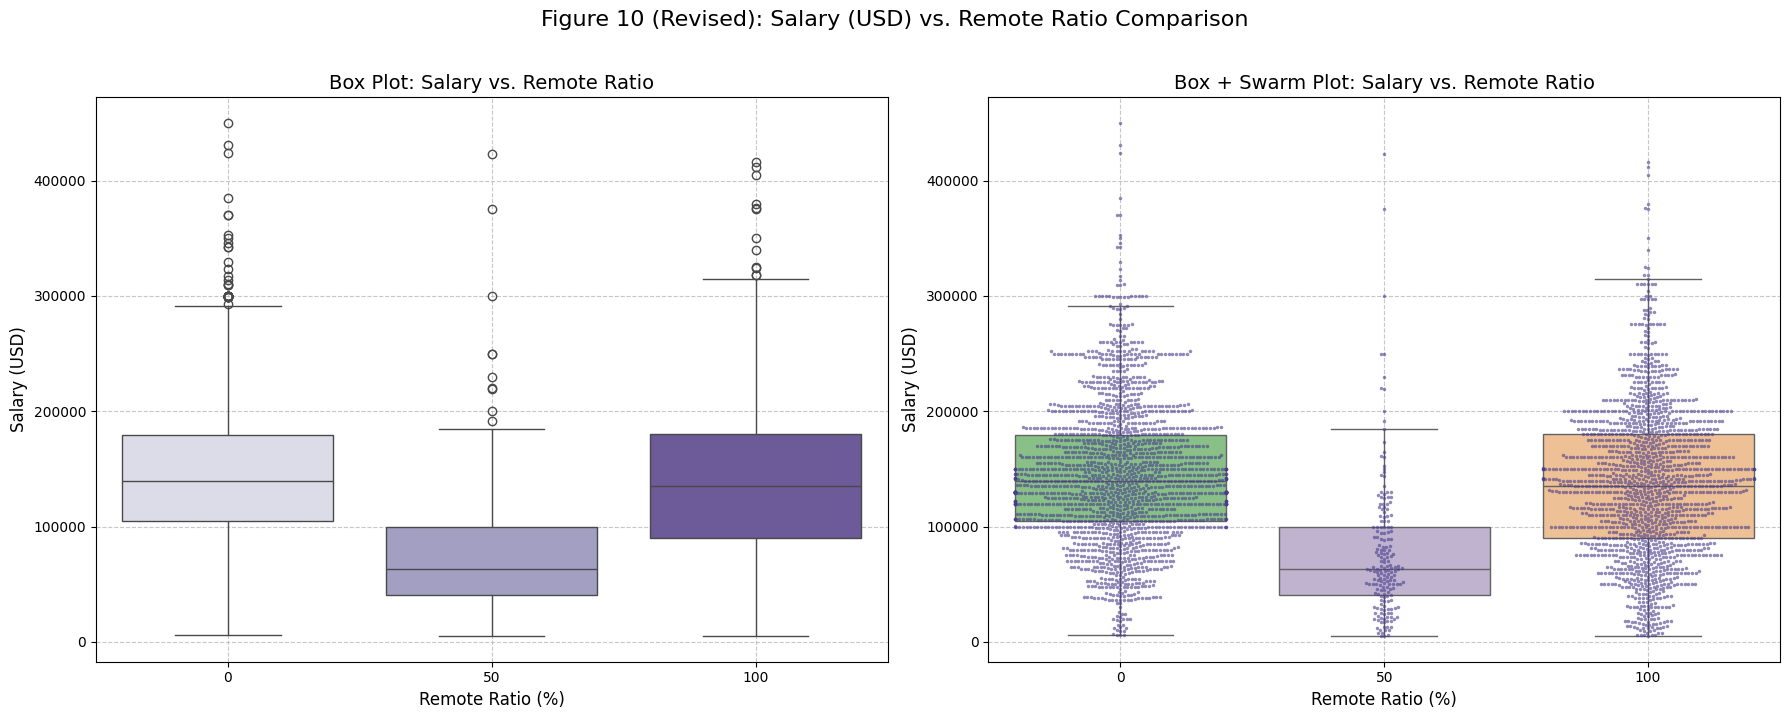

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
df['remote_ratio_str'] = df['remote_ratio'].astype(str)
remote_ratio_order = sorted(df['remote_ratio'].unique())
remote_ratio_str_order = sorted(df['remote_ratio_str'].unique(), key=int)

sns.boxplot(data=df, x='remote_ratio', y='salary_in_usd', order=remote_ratio_order,
            ax=axes[0], hue='remote_ratio_str', hue_order=remote_ratio_str_order, legend=False, palette="Purples")
axes[0].set_title('Box Plot: Salary vs. Remote Ratio', fontsize=14)
axes[0].set_xlabel('Remote Ratio (%)', fontsize=12)
axes[0].set_ylabel('Salary (USD)', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7)

sns.boxplot(data=df, x='remote_ratio', y='salary_in_usd', order=remote_ratio_order,
            showfliers=False, ax=axes[1], palette="Accent", saturation=0.75,
            hue='remote_ratio_str', hue_order=remote_ratio_str_order, legend=False)
sns.swarmplot(data=df, x='remote_ratio', y='salary_in_usd', order=remote_ratio_order,
              color=swarm_color, alpha=swarm_alpha, size=swarm_size, ax=axes[1])
axes[1].set_title('Box + Swarm Plot: Salary vs. Remote Ratio', fontsize=14)
axes[1].set_xlabel('Remote Ratio (%)', fontsize=12)
axes[1].set_ylabel('Salary (USD)', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.suptitle('Figure 10 (Revised): Salary (USD) vs. Remote Ratio Comparison', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 16.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 19.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


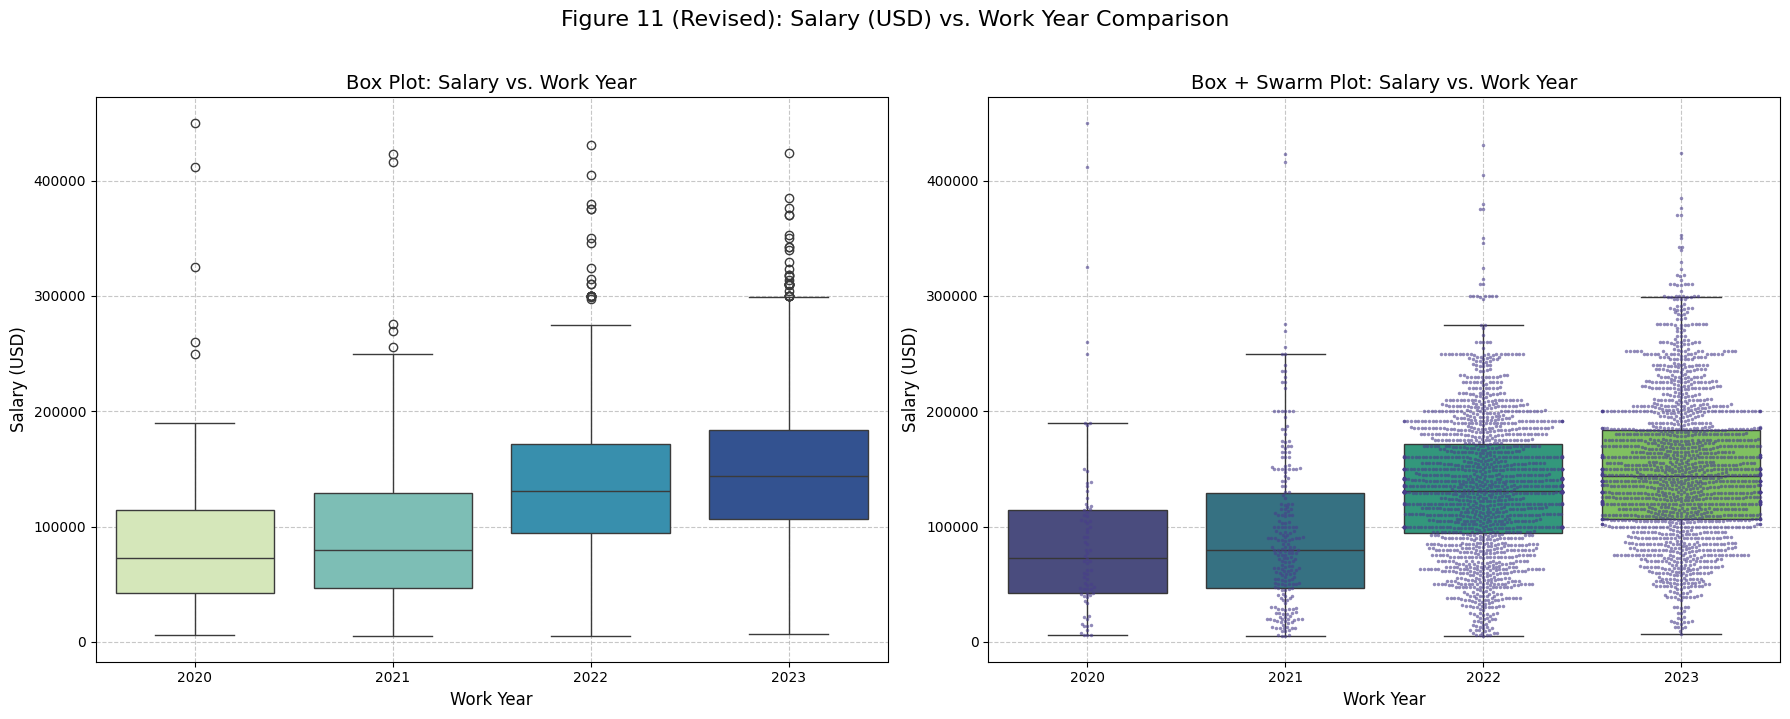

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
df['work_year_str'] = df['work_year'].astype(str)
work_year_order = sorted(df['work_year'].unique())
work_year_str_order = sorted(df['work_year_str'].unique())

sns.boxplot(data=df, x='work_year', y='salary_in_usd', order=work_year_order,
            ax=axes[0], hue='work_year_str', hue_order=work_year_str_order, legend=False, palette="YlGnBu")
axes[0].set_title('Box Plot: Salary vs. Work Year', fontsize=14)
axes[0].set_xlabel('Work Year', fontsize=12)
axes[0].set_ylabel('Salary (USD)', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7)

sns.boxplot(data=df, x='work_year', y='salary_in_usd', order=work_year_order,
            showfliers=False, ax=axes[1], palette="viridis", saturation=0.75,
            hue='work_year_str', hue_order=work_year_str_order, legend=False)
sns.swarmplot(data=df, x='work_year', y='salary_in_usd', order=work_year_order,
              color=swarm_color, alpha=swarm_alpha, size=swarm_size, ax=axes[1])
axes[1].set_title('Box + Swarm Plot: Salary vs. Work Year', fontsize=14)
axes[1].set_xlabel('Work Year', fontsize=12)
axes[1].set_ylabel('Salary (USD)', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.suptitle('Figure 11 (Revised): Salary (USD) vs. Work Year Comparison', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


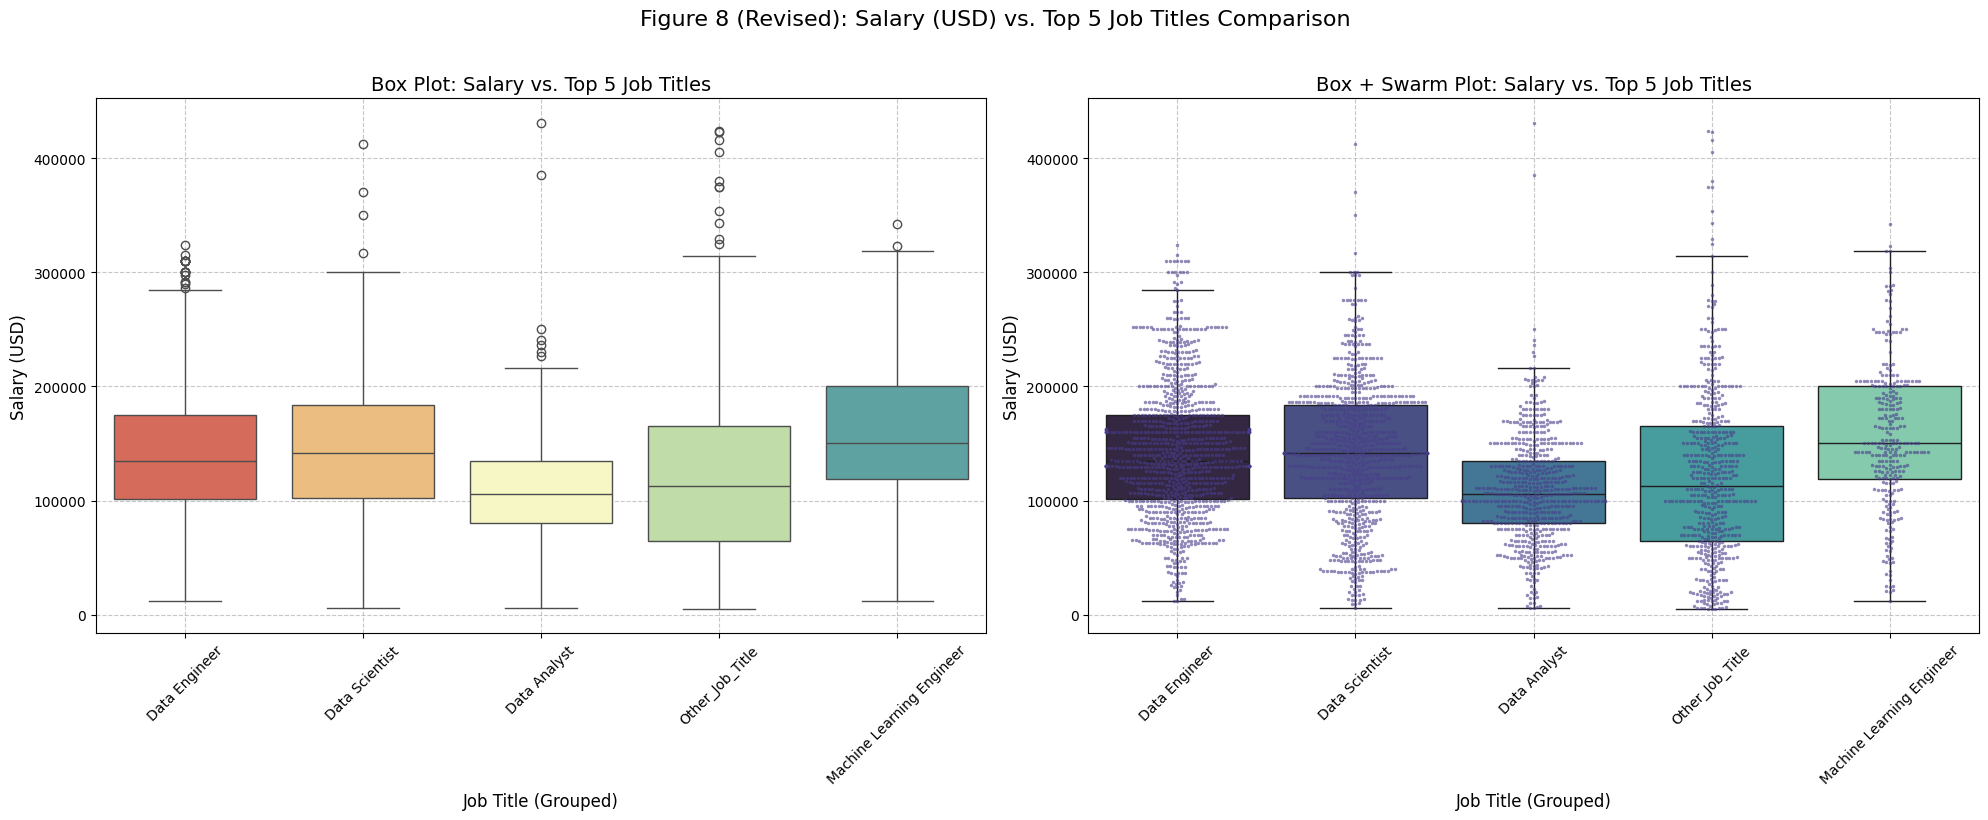

In [49]:
N_JOB_TITLES_DISPLAY = 5
top_job_titles_display = df['job_title_grouped'].value_counts().nlargest(N_JOB_TITLES_DISPLAY).index
df_top_jobs = df[df['job_title_grouped'].isin(top_job_titles_display)]

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.boxplot(data=df_top_jobs, x='job_title_grouped', y='salary_in_usd', order=top_job_titles_display,
            ax=axes[0], hue='job_title_grouped', hue_order=top_job_titles_display, legend=False, palette="Spectral")
axes[0].set_title(f'Box Plot: Salary vs. Top {N_JOB_TITLES_DISPLAY} Job Titles', fontsize=14)
axes[0].set_xlabel('Job Title (Grouped)', fontsize=12)
axes[0].set_ylabel('Salary (USD)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, linestyle='--', alpha=0.7)

sns.boxplot(data=df_top_jobs, x='job_title_grouped', y='salary_in_usd', order=top_job_titles_display,
            showfliers=False, ax=axes[1], palette="mako", saturation=0.75,
            hue='job_title_grouped', hue_order=top_job_titles_display, legend=False)
sns.swarmplot(data=df_top_jobs, x='job_title_grouped', y='salary_in_usd', order=top_job_titles_display,
              color=swarm_color, alpha=swarm_alpha, size=swarm_size, ax=axes[1])
axes[1].set_title(f'Box + Swarm Plot: Salary vs. Top {N_JOB_TITLES_DISPLAY} Job Titles', fontsize=14)
axes[1].set_xlabel('Job Title (Grouped)', fontsize=12)
axes[1].set_ylabel('Salary (USD)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.suptitle(f'Figure 8 (Revised): Salary (USD) vs. Top {N_JOB_TITLES_DISPLAY} Job Titles Comparison', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 42.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 33.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


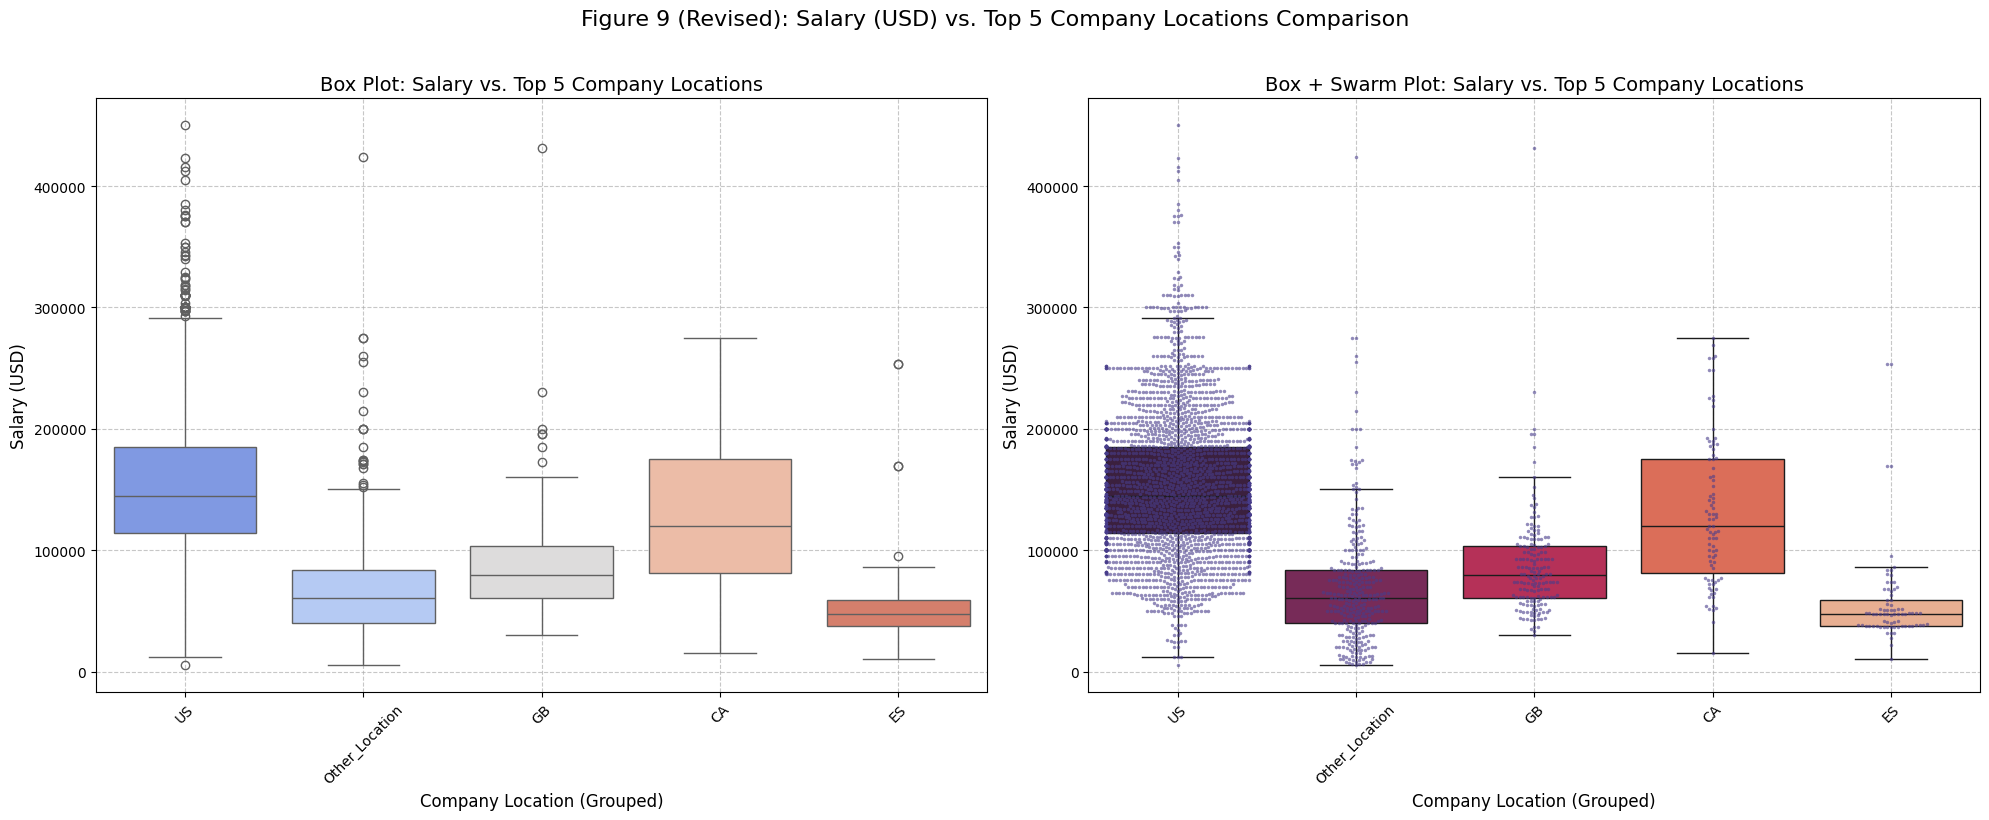

In [50]:
N_LOCATIONS_DISPLAY = 5
top_locations_display = df['company_location_grouped'].value_counts().nlargest(N_LOCATIONS_DISPLAY).index
df_top_locations = df[df['company_location_grouped'].isin(top_locations_display)]

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.boxplot(data=df_top_locations, x='company_location_grouped', y='salary_in_usd', order=top_locations_display,
            ax=axes[0], hue='company_location_grouped', hue_order=top_locations_display, legend=False, palette="coolwarm")
axes[0].set_title(f'Box Plot: Salary vs. Top {N_LOCATIONS_DISPLAY} Company Locations', fontsize=14)
axes[0].set_xlabel('Company Location (Grouped)', fontsize=12)
axes[0].set_ylabel('Salary (USD)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, linestyle='--', alpha=0.7)

sns.boxplot(data=df_top_locations, x='company_location_grouped', y='salary_in_usd', order=top_locations_display,
            showfliers=False, ax=axes[1], palette="rocket", saturation=0.75,
            hue='company_location_grouped', hue_order=top_locations_display, legend=False)
sns.swarmplot(data=df_top_locations, x='company_location_grouped', y='salary_in_usd', order=top_locations_display,
              color=swarm_color, alpha=swarm_alpha, size=swarm_size, ax=axes[1])
axes[1].set_title(f'Box + Swarm Plot: Salary vs. Top {N_LOCATIONS_DISPLAY} Company Locations', fontsize=14)
axes[1].set_xlabel('Company Location (Grouped)', fontsize=12)
axes[1].set_ylabel('Salary (USD)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.suptitle(f'Figure 9 (Revised): Salary (USD) vs. Top {N_LOCATIONS_DISPLAY} Company Locations Comparison', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [51]:
ordinal_features = {
    'experience_level': ['EN', 'MI', 'SE', 'EX'],
    'company_size': ['S', 'M', 'L']
}

for feature, categories in ordinal_features.items():
    encoder = OrdinalEncoder(categories=[categories], handle_unknown='use_encoded_value', unknown_value=-1)
    df[feature + '_encoded'] = encoder.fit_transform(df[[feature]])

print("Ordinal features encoded.")
print(df[['experience_level', 'experience_level_encoded', 'company_size', 'company_size_encoded']].head())

Ordinal features encoded.
  experience_level  experience_level_encoded company_size  \
0               SE                       2.0            L   
1               MI                       1.0            S   
2               MI                       1.0            S   
3               SE                       2.0            M   
4               SE                       2.0            M   

   company_size_encoded  
0                   2.0  
1                   0.0  
2                   0.0  
3                   1.0  
4                   1.0  


In [52]:
nominal_features = [
    'job_title_grouped',
    'company_location_grouped',
    'employee_residence_grouped',
    'employment_type_grouped',
    'remote_ratio',
    'work_year'
]

df_encoded = pd.get_dummies(df, columns=nominal_features, drop_first=True)
print(f"\nShape of DataFrame before one-hot encoding: {df.shape}")
print(f"Shape of DataFrame after one-hot encoding: {df_encoded.shape}")
print("Nominal features one-hot encoded (using pd.get_dummies).")


Shape of DataFrame before one-hot encoding: (3755, 20)
Shape of DataFrame after one-hot encoding: (3755, 42)
Nominal features one-hot encoded (using pd.get_dummies).


In [53]:
df_encoded['salary_band'] = pd.qcut(df_encoded['salary_in_usd_log'], q=3, labels=['Low', 'Medium', 'High'])

print("\n--- Value Counts for Salary Bands ---")
print(df_encoded['salary_band'].value_counts())


--- Value Counts for Salary Bands ---
salary_band
Medium    1315
Low       1252
High      1188
Name: count, dtype: int64


In [54]:
y_reg = df_encoded['salary_in_usd_log']
y_clf = df_encoded['salary_band']

columns_to_drop_for_X = [
    'salary', 'salary_currency', 'salary_in_usd', 'salary_in_usd_log',
    'job_title', 'company_location', 'employee_residence', 'employment_type',
    'experience_level', 'company_size',
    'salary_band'
]

X = df_encoded.drop(columns=columns_to_drop_for_X, errors='ignore')

print(f"\n--- Features for X (first 5 rows, few columns) ---")
print(X.head().iloc[:, :5])
print(f"Shape of X: {X.shape}")
print(f"Data types in X: \n{X.dtypes.value_counts()}")


--- Features for X (first 5 rows, few columns) ---
  remote_ratio_str work_year_str  experience_level_encoded  \
0              100          2023                       2.0   
1              100          2023                       1.0   
2              100          2023                       1.0   
3              100          2023                       2.0   
4              100          2023                       2.0   

   company_size_encoded  job_title_grouped_Applied Scientist  
0                   2.0                                False  
1                   0.0                                False  
2                   0.0                                False  
3                   1.0                                False  
4                   1.0                                False  
Shape of X: (3755, 32)
Data types in X: 
bool       28
object      2
float64     2
Name: count, dtype: int64


In [55]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

print(f"\nShape of X_train_reg: {X_train_reg.shape}, Shape of X_test_reg: {X_test_reg.shape}")
print(f"Shape of y_train_reg: {y_train_reg.shape}, Shape of y_test_reg: {y_test_reg.shape}")
print(f"Shape of X_train_clf: {X_train_clf.shape}, Shape of X_test_clf: {X_test_clf.shape}")

print("\nDistribution of salary_band in y_train_clf:")
print(y_train_clf.value_counts(normalize=True))
print("\nDistribution of salary_band in y_test_clf:")
print(y_test_clf.value_counts(normalize=True))


Shape of X_train_reg: (3004, 32), Shape of X_test_reg: (751, 32)
Shape of y_train_reg: (3004,), Shape of y_test_reg: (751,)
Shape of X_train_clf: (3004, 32), Shape of X_test_clf: (751, 32)

Distribution of salary_band in y_train_clf:
salary_band
Medium    0.350200
Low       0.333555
High      0.316245
Name: proportion, dtype: float64

Distribution of salary_band in y_test_clf:
salary_band
Medium    0.350200
Low       0.332889
High      0.316911
Name: proportion, dtype: float64


In [56]:
bool_cols_reg = X_train_reg.select_dtypes(include='bool').columns
X_train_reg_scaled_df = X_train_reg.copy()
X_test_reg_scaled_df = X_test_reg.copy()

X_train_reg_scaled_df[bool_cols_reg] = X_train_reg_scaled_df[bool_cols_reg].astype(int)
X_test_reg_scaled_df[bool_cols_reg] = X_test_reg_scaled_df[bool_cols_reg].astype(int)

scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg_scaled_df)
X_test_reg_scaled = scaler_reg.transform(X_test_reg_scaled_df)

print("Features scaled for Linear Regression.")

Features scaled for Linear Regression.


In [57]:
print("\n--- Linear Regression ---")
lr_model = LinearRegression()
lr_model.fit(X_train_reg_scaled, y_train_reg)

y_pred_lr_log = lr_model.predict(X_test_reg_scaled)
y_pred_lr = np.expm1(y_pred_lr_log)
y_test_actual = np.expm1(y_test_reg)

lr_mae = mean_absolute_error(y_test_actual, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_lr))
lr_r2 = r2_score(y_test_actual, y_pred_lr)
lr_r2_log = r2_score(y_test_reg, y_pred_lr_log)

print(f"Linear Regression MAE (USD): {lr_mae:.2f}")
print(f"Linear Regression RMSE (USD): {lr_rmse:.2f}")
print(f"Linear Regression R2 Score (Original Scale): {lr_r2:.4f}")
print(f"Linear Regression R2 Score (Log Scale): {lr_r2_log:.4f}")


--- Linear Regression ---
Linear Regression MAE (USD): 36514.82
Linear Regression RMSE (USD): 49239.64
Linear Regression R2 Score (Original Scale): 0.3858
Linear Regression R2 Score (Log Scale): 0.5487


In [58]:
X_train_dt = X_train_reg.copy()
X_test_dt = X_test_reg.copy()
bool_cols_dt_reg = X_train_dt.select_dtypes(include='bool').columns
X_train_dt[bool_cols_dt_reg] = X_train_dt[bool_cols_dt_reg].astype(int)
X_test_dt[bool_cols_dt_reg] = X_test_dt[bool_cols_dt_reg].astype(int)

In [59]:
print("\n--- Decision Tree Regressor ---")
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_dt, y_train_reg)

y_pred_dt_log = dt_model.predict(X_test_dt)
y_pred_dt = np.expm1(y_pred_dt_log)

dt_mae = mean_absolute_error(y_test_actual, y_pred_dt)
dt_rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_dt))
dt_r2 = r2_score(y_test_actual, y_pred_dt)
dt_r2_log = r2_score(y_test_reg, y_pred_dt_log)

print(f"Decision Tree MAE (USD): {dt_mae:.2f}")
print(f"Decision Tree RMSE (USD): {dt_rmse:.2f}")
print(f"Decision Tree R2 Score (Original Scale): {dt_r2:.4f}")
print(f"Decision Tree R2 Score (Log Scale): {dt_r2_log:.4f}")


--- Decision Tree Regressor ---
Decision Tree MAE (USD): 39078.39
Decision Tree RMSE (USD): 55158.38
Decision Tree R2 Score (Original Scale): 0.2293
Decision Tree R2 Score (Log Scale): 0.3388


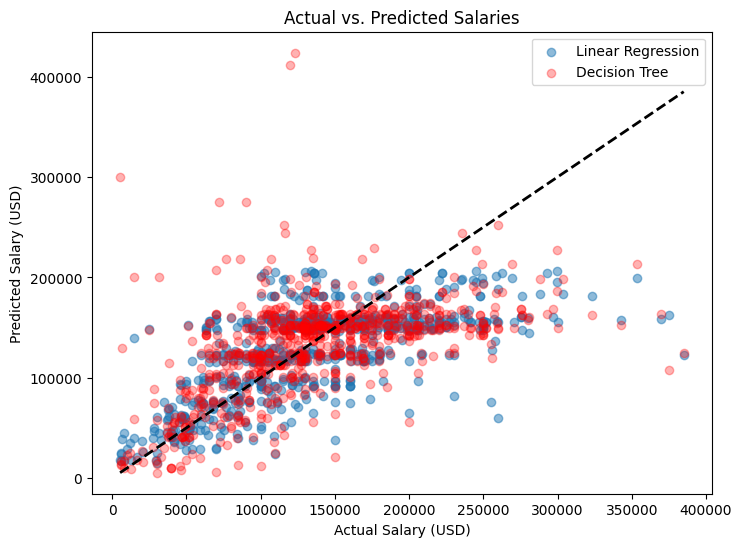

In [60]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_actual, y_pred_lr, alpha=0.5, label='Linear Regression')
plt.scatter(y_test_actual, y_pred_dt, alpha=0.3, label='Decision Tree', color='red')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'k--', lw=2)
plt.xlabel("Actual Salary (USD)")
plt.ylabel("Predicted Salary (USD)")
plt.title("Actual vs. Predicted Salaries")
plt.legend()
plt.show()

In [61]:
X_train_clf_scaled_df = X_train_clf.copy()
X_test_clf_scaled_df = X_test_clf.copy()

bool_cols_clf = X_train_clf.select_dtypes(include='bool').columns
X_train_clf_scaled_df[bool_cols_clf] = X_train_clf_scaled_df[bool_cols_clf].astype(int)
X_test_clf_scaled_df[bool_cols_clf] = X_test_clf_scaled_df[bool_cols_clf].astype(int)

X_train_clf_scaled = scaler_reg.transform(X_train_clf_scaled_df)
X_test_clf_scaled = scaler_reg.transform(X_test_clf_scaled_df)

print("Features scaled for Logistic Regression, KNN, and Naive Bayes.")

Features scaled for Logistic Regression, KNN, and Naive Bayes.


In [62]:
print("\n--- Logistic Regression ---")
models_clf = {}
log_reg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42, max_iter=1000)
log_reg_model.fit(X_train_clf_scaled, y_train_clf)
y_pred_log_reg = log_reg_model.predict(X_test_clf_scaled)
models_clf['Logistic Regression'] = log_reg_model

print(f"Accuracy: {accuracy_score(y_test_clf, y_pred_log_reg):.4f}")
print("Classification Report:")
print(classification_report(y_test_clf, y_pred_log_reg))


--- Logistic Regression ---
Accuracy: 0.5366
Classification Report:
              precision    recall  f1-score   support

        High       0.53      0.57      0.55       238
         Low       0.66      0.64      0.65       250
      Medium       0.42      0.40      0.41       263

    accuracy                           0.54       751
   macro avg       0.54      0.54      0.54       751
weighted avg       0.54      0.54      0.54       751



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [63]:
X_train_tree_clf = X_train_clf.copy()
X_test_tree_clf = X_test_clf.copy()
bool_cols_dt_clf = X_train_tree_clf.select_dtypes(include='bool').columns
X_train_tree_clf[bool_cols_dt_clf] = X_train_tree_clf[bool_cols_dt_clf].astype(int)
X_test_tree_clf[bool_cols_dt_clf] = X_test_tree_clf[bool_cols_dt_clf].astype(int)

In [64]:
print("\n--- Classification Tree ---")
clf_tree_model = DecisionTreeClassifier(random_state=42)
clf_tree_model.fit(X_train_tree_clf, y_train_clf)
y_pred_clf_tree = clf_tree_model.predict(X_test_tree_clf)
models_clf['Classification Tree'] = clf_tree_model

print(f"Accuracy: {accuracy_score(y_test_clf, y_pred_clf_tree):.4f}")
print("Classification Report:")
print(classification_report(y_test_clf, y_pred_clf_tree))


--- Classification Tree ---
Accuracy: 0.5220
Classification Report:
              precision    recall  f1-score   support

        High       0.50      0.49      0.49       238
         Low       0.67      0.64      0.65       250
      Medium       0.42      0.43      0.42       263

    accuracy                           0.52       751
   macro avg       0.53      0.52      0.52       751
weighted avg       0.52      0.52      0.52       751



In [65]:
print("\n--- Naive Bayes (GaussianNB) ---")
nb_model = GaussianNB()
nb_model.fit(X_train_clf_scaled, y_train_clf)
y_pred_nb = nb_model.predict(X_test_clf_scaled)
models_clf['Naive Bayes'] = nb_model

print(f"Accuracy: {accuracy_score(y_test_clf, y_pred_nb):.4f}")
print("Classification Report:")
print(classification_report(y_test_clf, y_pred_nb))


--- Naive Bayes (GaussianNB) ---
Accuracy: 0.4514
Classification Report:
              precision    recall  f1-score   support

        High       0.86      0.05      0.10       238
         Low       0.86      0.29      0.44       250
      Medium       0.39      0.97      0.56       263

    accuracy                           0.45       751
   macro avg       0.70      0.44      0.36       751
weighted avg       0.69      0.45      0.37       751



In [66]:
print("\n--- K-Nearest Neighbors (KNN) ---")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_clf_scaled, y_train_clf)
y_pred_knn = knn_model.predict(X_test_clf_scaled)
models_clf['KNN'] = knn_model

print(f"Accuracy: {accuracy_score(y_test_clf, y_pred_knn):.4f}")
print("Classification Report:")
print(classification_report(y_test_clf, y_pred_knn))


--- K-Nearest Neighbors (KNN) ---
Accuracy: 0.4847
Classification Report:
              precision    recall  f1-score   support

        High       0.47      0.51      0.49       238
         Low       0.57      0.64      0.60       250
      Medium       0.39      0.32      0.35       263

    accuracy                           0.48       751
   macro avg       0.48      0.49      0.48       751
weighted avg       0.48      0.48      0.48       751




--- Confusion Matrix (for Logistic Regression) ---


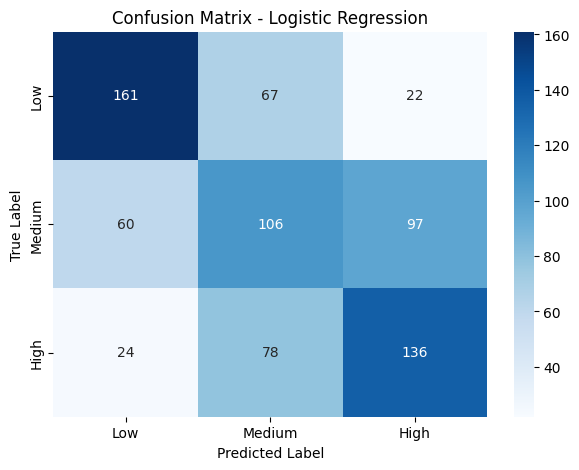

In [67]:
print("\n--- Confusion Matrix (for Logistic Regression) ---")
cm_log_reg = confusion_matrix(y_test_clf, y_pred_log_reg, labels=['Low', 'Medium', 'High'])
plt.figure(figsize=(7, 5))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [68]:
print("\n--- Tuning Decision Tree Regressor ---")
param_grid_dt_reg = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt_reg = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid_dt_reg,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

grid_search_dt_reg.fit(X_train_dt, y_train_reg)
best_dt_regressor = grid_search_dt_reg.best_estimator_
print(f"Best parameters for Decision Tree Regressor: {grid_search_dt_reg.best_params_}")

y_pred_dt_tuned_log = best_dt_regressor.predict(X_test_dt)
y_pred_dt_tuned = np.expm1(y_pred_dt_tuned_log)

dt_tuned_mae = mean_absolute_error(y_test_actual, y_pred_dt_tuned)
dt_tuned_rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_dt_tuned))
dt_tuned_r2 = r2_score(y_test_actual, y_pred_dt_tuned)
dt_tuned_r2_log = r2_score(y_test_reg, y_pred_dt_tuned_log)

print(f"Tuned Decision Tree MAE (USD): {dt_tuned_mae:.2f}")
print(f"Tuned Decision Tree RMSE (USD): {dt_tuned_rmse:.2f}")
print(f"Tuned Decision Tree R2 Score (Original Scale): {dt_tuned_r2:.4f}")
print(f"Tuned Decision Tree R2 Score (Log Scale): {dt_tuned_r2_log:.4f}")

print("\nCompare with default Decision Tree Regressor:")
print(f"Default Decision Tree MAE (USD): {dt_mae:.2f}")
print(f"Default Decision Tree R2 Score (Log Scale): {dt_r2_log:.4f}")


--- Tuning Decision Tree Regressor ---
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters for Decision Tree Regressor: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Tuned Decision Tree MAE (USD): 37286.50
Tuned Decision Tree RMSE (USD): 50199.58
Tuned Decision Tree R2 Score (Original Scale): 0.3617
Tuned Decision Tree R2 Score (Log Scale): 0.5297

Compare with default Decision Tree Regressor:
Default Decision Tree MAE (USD): 39078.39
Default Decision Tree R2 Score (Log Scale): 0.3388


In [69]:
print("\n--- Tuning Decision Tree Classifier ---")
param_grid_dt_clf = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search_dt_clf = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt_clf,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_search_dt_clf.fit(X_train_tree_clf, y_train_clf)
best_dt_classifier = grid_search_dt_clf.best_estimator_
print(f"Best parameters for Decision Tree Classifier: {grid_search_dt_clf.best_params_}")

y_pred_dt_clf_tuned = best_dt_classifier.predict(X_test_tree_clf)

print(f"\nTuned Decision Tree Classifier Accuracy: {accuracy_score(y_test_clf, y_pred_dt_clf_tuned):.4f}")
print("Tuned Decision Tree Classifier Classification Report:")
print(classification_report(y_test_clf, y_pred_dt_clf_tuned))

print("\nCompare with default Decision Tree Classifier:")
default_dt_clf_accuracy = accuracy_score(y_test_clf, clf_tree_model.predict(X_test_tree_clf))
print(f"Default Decision Tree Classifier Accuracy: {default_dt_clf_accuracy:.4f}")


--- Tuning Decision Tree Classifier ---
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters for Decision Tree Classifier: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}

Tuned Decision Tree Classifier Accuracy: 0.5233
Tuned Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

        High       0.50      0.46      0.48       238
         Low       0.66      0.66      0.66       250
      Medium       0.42      0.44      0.43       263

    accuracy                           0.52       751
   macro avg       0.53      0.52      0.52       751
weighted avg       0.52      0.52      0.52       751


Compare with default Decision Tree Classifier:
Default Decision Tree Classifier Accuracy: 0.5220


In [70]:
if 'remote_ratio_str' in df.columns:
    df.drop('remote_ratio_str', axis=1, inplace=True)
if 'work_year_str' in df.columns:
    df.drop('work_year_str', axis=1, inplace=True)
print("\nTemporary EDA columns cleaned up from df.")


Temporary EDA columns cleaned up from df.
